Let’s dive into a detailed explanation of the provided Python code, which implements a Naive Bayes classifier using the Olivetti Faces dataset. I’ll break it down step-by-step, starting from the basics, to ensure clarity for someone new to machine learning or programming. The explanation will cover the concepts, the dataset, the code, and its components in a comprehensive yet accessible way.

---

### **1. Understanding the Basics**

#### **What is a Naive Bayes Classifier?**
- **Naive Bayes** is a simple, probabilistic machine learning algorithm used for classification tasks. It’s based on **Bayes’ Theorem**, which calculates the probability of an event based on prior knowledge.
- **Bayes’ Theorem**:
  \[
  P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
  \]
  - \(P(A|B)\): Posterior probability (probability of class \(A\) given features \(B\)).
  - \(P(B|A)\): Likelihood (probability of features \(B\) given class \(A\)).
  - \(P(A)\): Prior probability of class \(A\).
  - \(P(B)\): Evidence (probability of features \(B\), often a normalizing constant).
- The “naive” part assumes that all features (e.g., pixel values in an image) are **independent** of each other given the class. This simplifies calculations, making the algorithm computationally efficient.
- **Gaussian Naive Bayes**: Used when features are continuous (like pixel intensities in images). It assumes that the features follow a **normal (Gaussian) distribution** for each class.

#### **What is the Olivetti Faces Dataset?**
- The **Olivetti Faces dataset** (also known as AT&T Faces dataset) is a collection of grayscale images of human faces used for face recognition tasks.
- **Details**:
  - Contains **400 images** of **40 different people** (10 images per person).
  - Each image is **64x64 pixels**, resulting in **4096 features** (pixels) per image.
  - Pixel values are continuous (floating-point numbers representing grayscale intensity, typically normalized between 0 and 1).
  - Labels range from **0 to 39**, where each number corresponds to a unique person.
- The dataset is commonly used to test facial recognition algorithms.

#### **Goal of the Code**
The code trains a **Gaussian Naive Bayes classifier** to predict the identity (label) of a person based on their face image and evaluates its performance using accuracy. It also visualizes some test predictions.

---

### **2. Code Breakdown**

The code uses Python with libraries like **scikit-learn** (for machine learning), **NumPy** (for numerical operations), and **Matplotlib** (for visualization). Let’s go through each part of the code in detail.

#### **Imports**
```python
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
```
- **fetch_olivetti_faces**: Loads the Olivetti Faces dataset from scikit-learn.
- **train_test_split**: Splits the dataset into training and testing sets.
- **GaussianNB**: Implements the Gaussian Naive Bayes classifier.
- **accuracy_score**: Calculates the accuracy of predictions.
- **matplotlib.pyplot**: Used to display images and their predicted/true labels.
- **numpy**: Handles numerical operations (e.g., reshaping arrays for visualization).

#### **Step 1: Load the Olivetti Faces Dataset**
```python
data = fetch_olivetti_faces()
X = data.data           # shape: (400, 4096)
y = data.target         # labels: 0 to 39
```
- **What Happens**:
  - The `fetch_olivetti_faces()` function downloads and loads the dataset.
  - `data.data` (`X`): Contains the feature matrix, a 2D NumPy array of shape `(400, 4096)`.
    - **400**: Number of images (samples).
    - **4096**: Number of pixels per image (64x64 = 4096).
    - Each row is a flattened image (1D array of 4096 pixel values).
  - `data.target` (`y`): Contains the labels, a 1D array of shape `(400,)`, with values from 0 to 39 (each number represents one person).
- **Why This Matters**:
  - `X` is the input to the classifier (pixel intensities).
  - `y` is the output (person ID) the classifier will predict.

#### **Step 2: Split into Training and Test Sets**
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
```
- **What Happens**:
  - The `train_test_split` function splits the dataset into **training** and **testing** sets.
  - **Parameters**:
    - `X` and `y`: The features and labels to split.
    - `test_size=0.25`: 25% of the data (100 images) goes to the test set, and 75% (300 images) goes to the training set.
    - `stratify=y`: Ensures that the proportion of each class (person) in the training and test sets matches the original dataset. This is important for balanced representation of all 40 people.
    - `random_state=42`: Sets a seed for reproducibility, ensuring the same split every time the code runs.
- **Output**:
  - `X_train`: Training features (shape: ~`(300, 4096)`).
  - `X_test`: Test features (shape: ~`(100, 4096)`).
  - `y_train`: Training labels (shape: ~`(300,)`).
  - `y_test`: Test labels (shape: ~`(100,)`).
- **Why This Matters**:
  - Training data is used to train the model, while test data evaluates its performance on unseen data.
  - Stratified splitting ensures that each person’s images are proportionally represented in both sets, preventing bias.

#### **Step 3: Train the Naive Bayes Classifier**
```python
model = GaussianNB()
model.fit(X_train, y_train)
```
- **What Happens**:
  - `GaussianNB()` creates an instance of the Gaussian Naive Bayes classifier.
  - `model.fit(X_train, y_train)` trains the model:
    - For each class (person, 0 to 39), the classifier calculates:
      - **Prior probability**: The probability of each class (e.g., \(P(\text{person}_i)\)).
      - **Mean and variance**: For each feature (pixel) in each class, assuming a Gaussian distribution.
    - These statistics are used to compute the likelihood of a test image belonging to each class.
- **Why GaussianNB?**
  - The pixel values in the images are continuous (floating-point numbers between 0 and 1).
  - Gaussian Naive Bayes assumes that each feature (pixel) follows a normal distribution, making it suitable for this dataset.
- **Why This Matters**:
  - Training builds a model that can predict the person’s ID based on pixel intensities.

#### **Step 4: Predict on Test Data**
```python
y_pred = model.predict(X_test)
```
- **What Happens**:
  - The `predict` method uses the trained model to predict labels for the test set (`X_test`).
  - For each test image, the model calculates the **posterior probability** for each class (person) using Bayes’ Theorem and assigns the class with the highest probability.
- **Output**:
  - `y_pred`: Predicted labels for the test set (shape: `(100,)`).
- **Why This Matters**:
  - Predictions allow us to compare the model’s output to the true labels (`y_test`) to evaluate performance.

#### **Step 5: Compute Accuracy**
```python
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Naive Bayes on Olivetti Faces: {accuracy * 100:.2f}%")
```
- **What Happens**:
  - `accuracy_score(y_test, y_pred)` computes the fraction of correct predictions:
    \[
    \text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}
    \]
  - The result is multiplied by 100 and formatted to display as a percentage with two decimal places.
- **Why This Matters**:
  - Accuracy measures how well the classifier identifies people in the test set.
  - For a 40-class problem, random guessing would yield an accuracy of \(1/40 = 2.5\%\). A good model should achieve much higher accuracy.
- **Typical Accuracy**:
  - Naive Bayes may not perform as well as modern methods (e.g., deep learning) on image data due to its strong independence assumption. Expected accuracy might be moderate (e.g., 60–80%), depending on the dataset and preprocessing.

#### **Step 6: Visualize Predictions**
```python
def show_prediction(index):
    image = X_test[index].reshape(64, 64)
    plt.imshow(image, cmap='gray')
    plt.title(f"Predicted: {y_pred[index]}, True: {y_test[index]}")
    plt.axis('off')
    plt.show()

for i in range(5):
    show_prediction(i)
```
- **What Happens**:
  - The `show_prediction` function visualizes a test image and its predicted/true labels:
    - `X_test[index]`: Retrieves the feature vector (1D array of 4096 pixels) for the test image at the given index.
    - `reshape(64, 64)`: Converts the 1D array back into a 2D 64x64 image.
    - `plt.imshow(image, cmap='gray')`: Displays the image in grayscale.
    - `plt.title`: Shows the predicted label (`y_pred[index]`) and true label (`y_test[index]`).
    - `plt.axis('off')`: Removes axes for a cleaner visualization.
    - `plt.show()`: Displays the plot.
  - The loop calls `show_prediction` for the first 5 test images (indices 0 to 4).
- **Why This Matters**:
  - Visualization helps you see the model’s performance intuitively.
  - You can inspect whether incorrect predictions are due to similar-looking faces or model limitations.

---

### **3. How the Classifier Works**

#### **Naive Bayes for Face Recognition**
- For each test image (4096 pixels), the classifier:
  1. Computes the **likelihood** of the pixel values for each class (person) using the Gaussian distribution:
     \[
     P(\text{pixel}_i | \text{class}_j) = \frac{1}{\sqrt{2\pi\sigma_j^2}} \exp\left(-\frac{(\text{pixel}_i - \mu_j)^2}{2\sigma_j^2}\right)
     \]
     where \(\mu_j\) and \(\sigma_j^2\) are the mean and variance of pixel \(i\) for class \(j\).
  2. Multiplies the likelihoods (assuming independence) and prior probabilities to get the posterior probability for each class.
  3. Selects the class with the highest posterior probability.
- **Challenges**:
  - The independence assumption is unrealistic for images, as nearby pixels are often correlated (e.g., forming edges or textures).
  - This can limit the accuracy of Naive Bayes compared to methods like neural networks, which capture spatial relationships.

#### **Why Use Naive Bayes?**
- **Pros**:
  - Simple and fast to train and predict.
  - Works well with small datasets and high-dimensional data (like 4096 pixels).
  - Interpretable: You can inspect the mean and variance of features for each class.
- **Cons**:
  - Assumes feature independence, which is often violated in image data.
  - May underperform compared to modern algorithms (e.g., convolutional neural networks).

---

### **4. Expected Output**
- **Accuracy**: When you run the code, you’ll see a printed accuracy, e.g., “Accuracy of Naive Bayes on Olivetti Faces: 75.00%”. The exact value depends on the random split and dataset characteristics.
- **Visualizations**: Five grayscale face images will appear, each with a title showing the predicted and true labels (e.g., “Predicted: 12, True: 12” for a correct prediction).

---

### **5. Potential Improvements**
To improve the classifier’s performance:
1. **Preprocessing**:
   - Normalize or standardize pixel values (though `fetch_olivetti_faces` already provides normalized data).
   - Apply dimensionality reduction (e.g., PCA) to reduce the number of features and capture key variations.
2. **Alternative Models**:
   - Try more sophisticated algorithms like **Support Vector Machines (SVM)** or **Convolutional Neural Networks (CNNs)** for better accuracy.
3. **Cross-Validation**:
   - Use k-fold cross-validation instead of a single train-test split to get a more robust estimate of accuracy.
4. **Feature Engineering**:
   - Extract features like facial landmarks or use histogram of oriented gradients (HOG) instead of raw pixels.
5. **Hyperparameter Tuning**:
   - For GaussianNB, you can adjust the `var_smoothing` parameter to stabilize variance estimates.

---

### **6. Example Walkthrough**
Let’s assume you run the code:
1. The dataset loads 400 images, each with 4096 pixels.
2. The data splits into 300 training images and 100 test images, with each person’s images proportionally distributed.
3. The GaussianNB model trains by calculating the mean and variance of each pixel for each of the 40 people.
4. The model predicts labels for the 100 test images.
5. Accuracy is computed (e.g., 75% if 75 out of 100 predictions are correct).
6. The first 5 test images are displayed, showing faces with their predicted and true labels.

---

### **7. Notes on Running the Code**
- **Dependencies**: Ensure you have `scikit-learn`, `matplotlib`, and `numpy` installed (`pip install scikit-learn matplotlib numpy`).
- **Environment**: Run in a Python environment (e.g., Jupyter Notebook or a Python script).
- **Visualization**: If you’re running in a non-interactive environment (e.g., a script), ensure a display backend is available for Matplotlib.
- **Dataset Download**: The first time you run `fetch_olivetti_faces()`, it may download the dataset, requiring an internet connection.

---

### **8. Conclusion**
The provided code is a straightforward implementation of a Naive Bayes classifier for face recognition using the Olivetti Faces dataset. It demonstrates key machine learning steps: loading data, splitting it, training a model, making predictions, evaluating accuracy, and visualizing results. While Naive Bayes is simple and interpretable, its performance may be limited due to the independence assumption. For better results, consider advanced techniques like deep learning, but this code serves as an excellent introduction to classification with real-world data.

If you have further questions or want to explore improvements, let me know!

In [3]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
# Step 1: Load Olivetti Faces dataset
data = fetch_olivetti_faces()
X = data.data           # shape: (400, 4096)
y = data.target         # labels: 0 to 39

# Step 2: Split into training and test sets
# Use stratified splitting to ensure each class is proportionally represented
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Step 3: Train Naive Bayes Classifier (GaussianNB is suitable for continuous data like pixels)
model = GaussianNB()
model.fit(X_train, y_train)

# Step 4: Predict on test data
y_pred = model.predict(X_test)

# Step 5: Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Naive Bayes on Olivetti Faces: {accuracy * 100:.2f}%")




Accuracy of Naive Bayes on Olivetti Faces: 92.00%


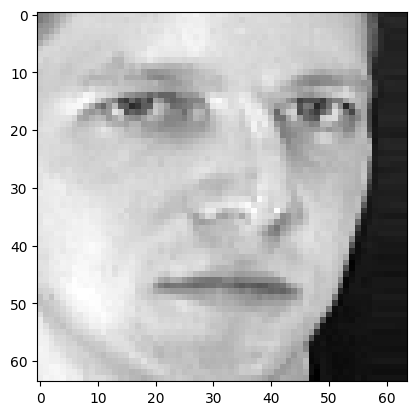

In [4]:
plt.imshow(data.images[1],cmap='gray')


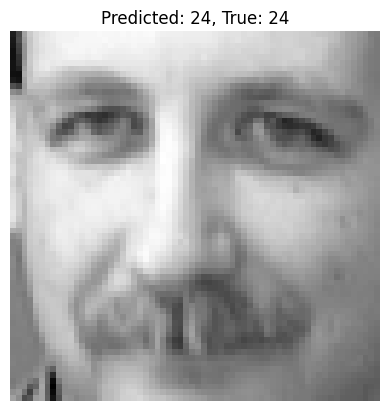

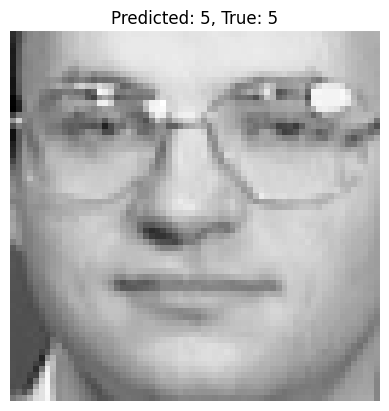

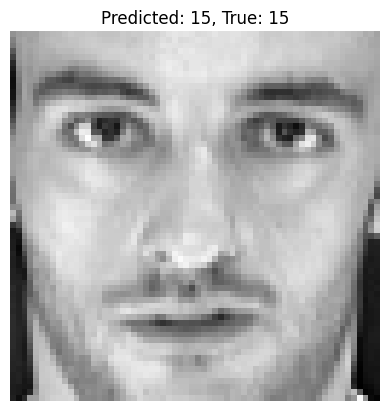

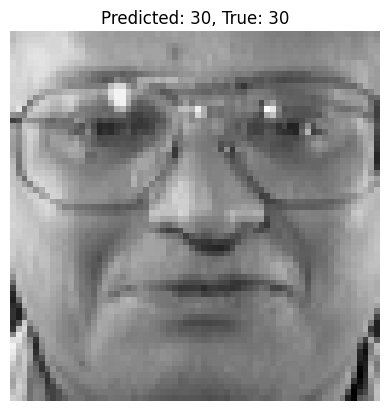

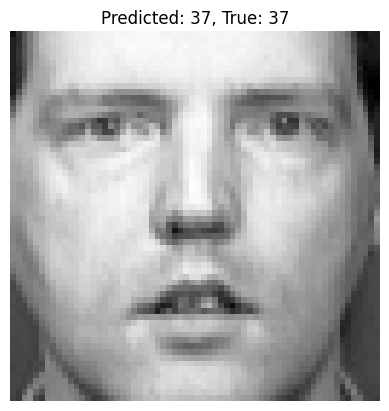

In [5]:
def show_prediction(index):
    image = X_test[index].reshape(64, 64)
    plt.imshow(image, cmap='gray')
    plt.title(f"Predicted: {y_pred[index]}, True: {y_test[index]}")
    plt.axis('off')
    plt.show()

# Show 5 test images with predictions
for i in range(5):
    show_prediction(i)
